### **Analisis Prediktif: Prediksi Penyakit Stroke**

*oleh : Indah Dwi Sulistiyawati*

*Proyek Submission 1 - Machine Learning Terapan Dicoding*

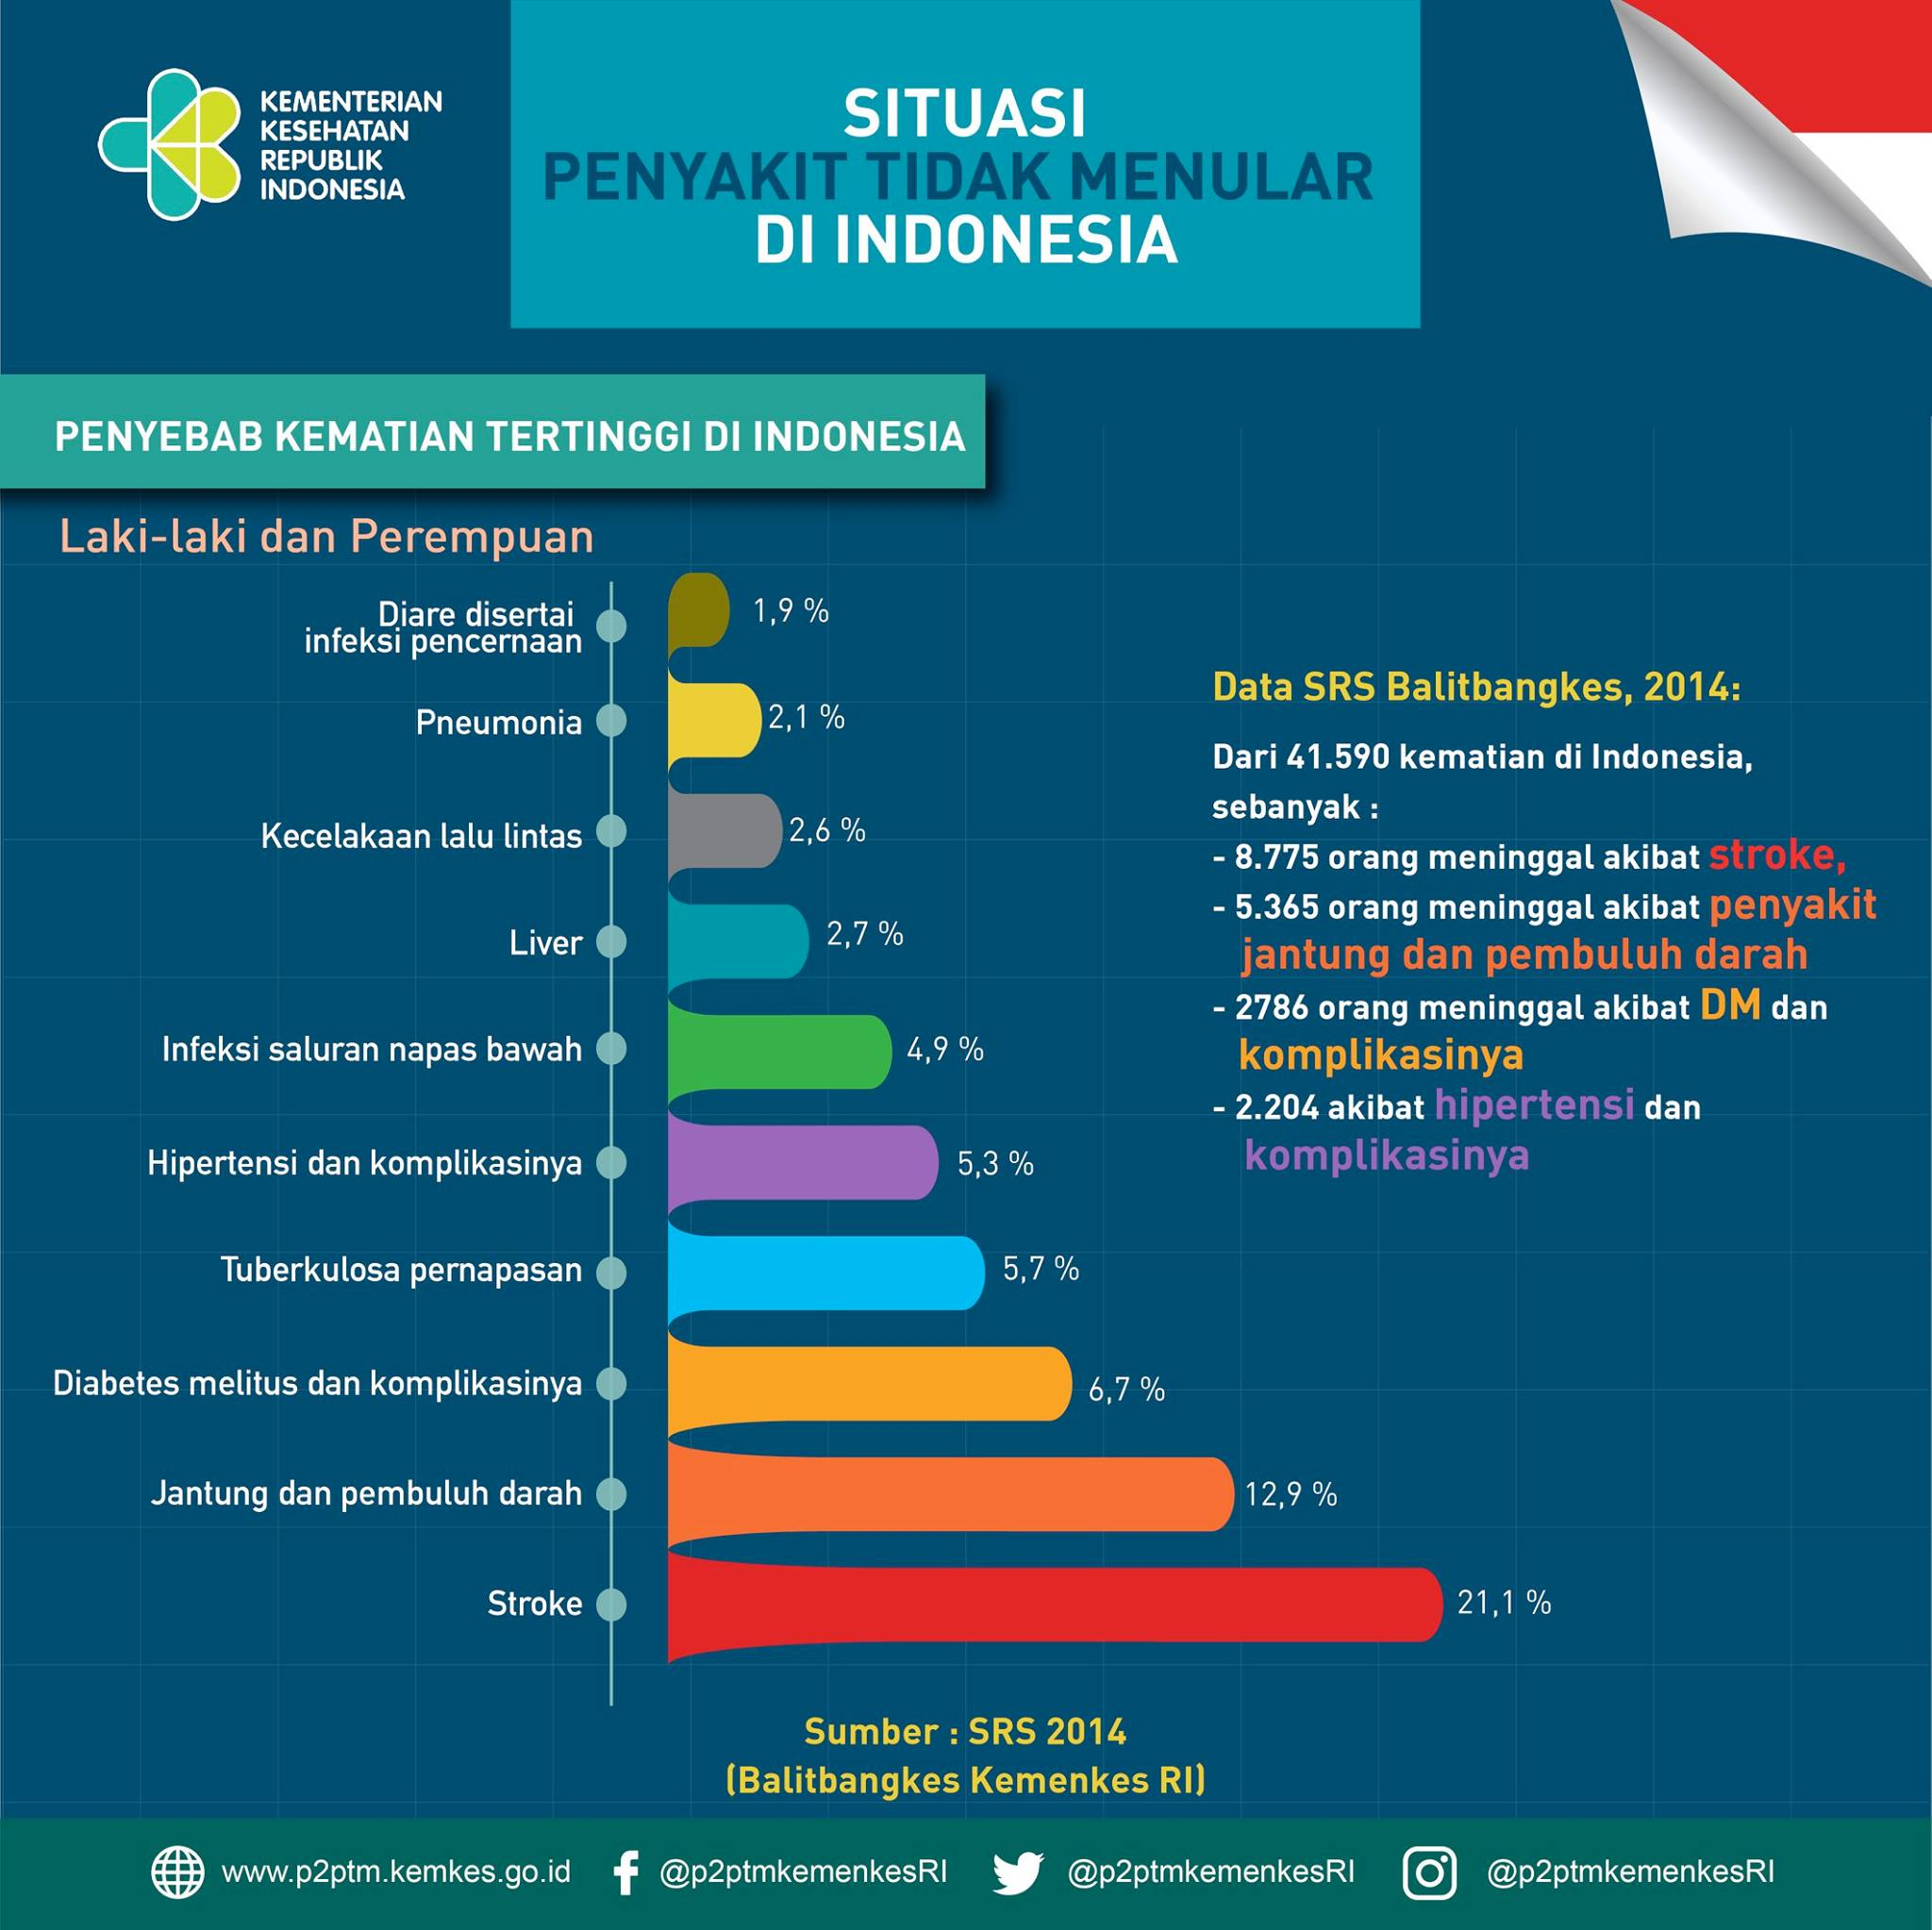

####**Pendahuluan**

Pada proyek ini, topik yang dibahas adalah mengenai kesehatan yang di buat untuk mengetahui apakah kita mendapati penyakit stroke atau tidak. Proyek ini dibuat untuk proyek Submission 1 - Machine Learning Terapan Dicoding.

# **1. Import library yang dibutuhkan**

In [1]:
import numpy as np #untuk operasi numerik
import pandas as pd #untuk mengoperasikan dataframe
import seaborn as sns #untuk memudahkan memvisualisasikan data
import matplotlib.pyplot as plt #untuk visualisasi data
from sklearn.svm import SVC
from google.colab import files, output
from sklearn.metrics import accuracy_score #metrik evaluasi model dengan akurasi

#untuk membuat model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

# **2. Mempersiapkan Dataset**

**2.1 Menyiapkan kredensial akun Kaggle**

In [2]:
# Membuat folder .kaggle di dalam folder root
!rm -rf ~/.kaggle && mkdir ~/.kaggle/

# Menyalin berkas kaggle.json pada direktori aktif saat ini ke folder .kaggle
!mv kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


**2.2 Mengunduh dan Menyiapkan Dataset**

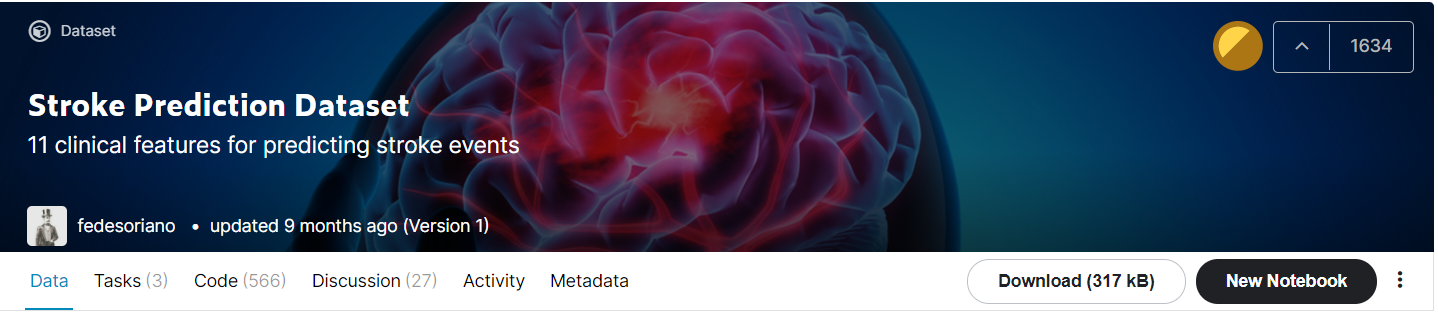

sumber dataset : https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

In [3]:
# Mengunduh dataset menggunakan Kaggle CLI
!kaggle datasets download fedesoriano/stroke-prediction-dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [4]:
# Mengekstrak berkas zip ke direktori aktif saat ini
!unzip /content/stroke-prediction-dataset.zip

Archive:  /content/stroke-prediction-dataset.zip
replace healthcare-dataset-stroke-data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: healthcare-dataset-stroke-data.csv  


# **3. Pemahaman Data (Data Understanding)**

**3.1 Memuat Data pada sebuah Dataframe menggunakan pandas**

In [5]:
data = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**3.2 *Exploratory Data Analysis* (EDA)**

Deskripsi Variabel 

In [6]:
data.columns = [column.lower() for column in data.columns]
print("Total:", data.shape[0], end="\n\n")
data.info()

Total: 5110

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Deskripssi Statistik

In [7]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


**3.2 Menghapus data yang memiliki nilai sama**

In [8]:
print("Total data sebelum dihapus:", data.shape[0])
data = data.drop_duplicates()
print("Total data sesudah dihapus:", data.shape[0])

Total data sebelum dihapus: 5110
Total data sesudah dihapus: 5110


**3.3 Menangani Missing Value**

In [9]:
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

**3.3.1 Visualisasi data kosong**

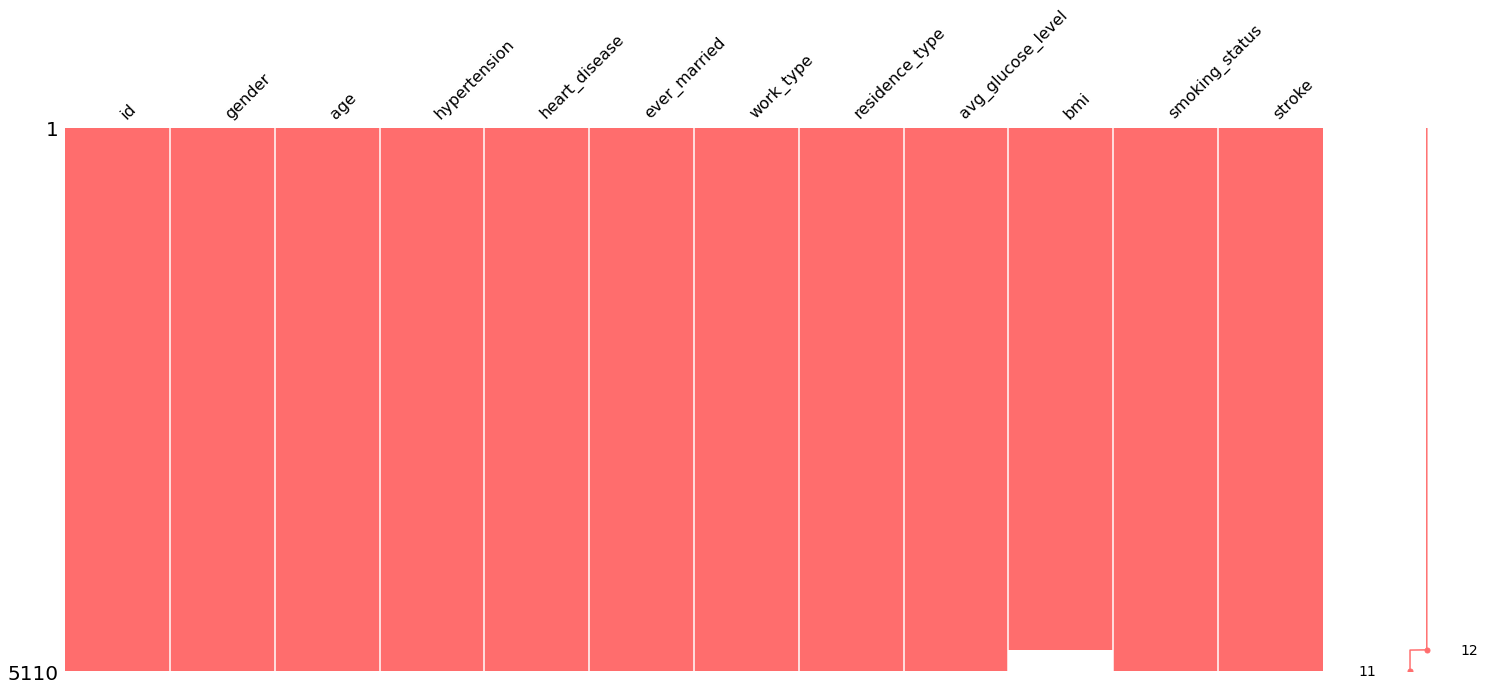

In [10]:
# Melakukan visualisasi data yang kosong
import missingno as msno
sorted_null = msno.nullity_sort(data, sort='descending') 
figures = msno.matrix(sorted_null, color=(1, 0.43, 0.43))

**3.4 Drop kolom id**

In [11]:
print("Sebelum Kolom Didrop: ", data.columns)
data = data.drop(columns=["id"])
print("\nSetelah Kolom Didrop: ", data.columns)

Sebelum Kolom Didrop:  Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

Setelah Kolom Didrop:  Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


**3.5 Menangani Outliers**

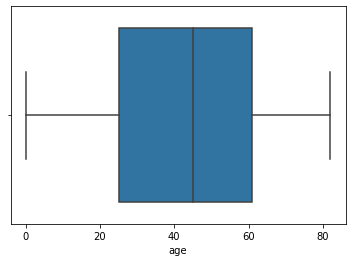

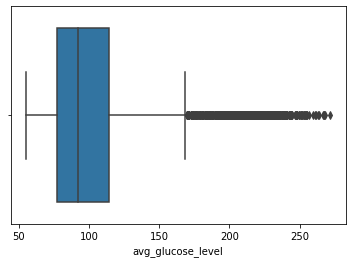

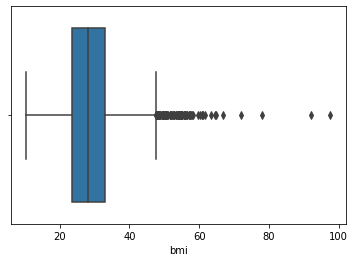

In [12]:
# Cek outliers
numerical_columns = ["age", "avg_glucose_level", "bmi"]
for column in numerical_columns:
    sns.boxplot(x=data[column])
    plt.show()

**3.5.1 Menghapus nilai outliers**

Tujuannya adalah agar nilai outlier tidak mempengaruhi performa model

In [13]:
print("Total data sebelum outliers dihapus: ", data.shape[0])
for column in numerical_columns:
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    fence_low  = q1 - 1.5*iqr
    fence_high = q3 + 1.5*iqr
    data = data.loc[(data[column] > fence_low) & (data[column] < fence_high)]
print("Total data setelah outliers dihapus: ", data.shape[0])

Total data sebelum outliers dihapus:  5110
Total data setelah outliers dihapus:  4253


**3.6 Analisis Univariat**

Akan dilakukan analisa pada kolom categorical



        Total   Persentase
Female    2524        59.3
Male      1728        40.6
Other        1         0.0



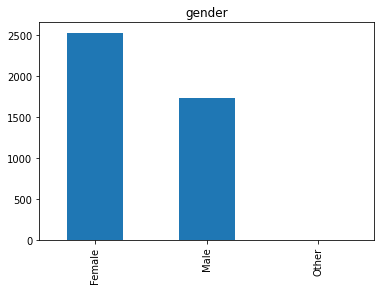

     Total   Persentase
Yes    2638        62.0
No     1615        38.0



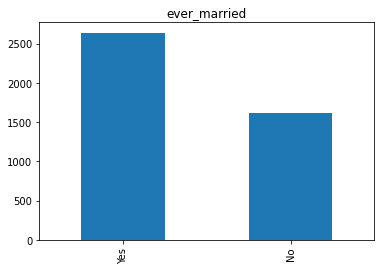

               Total   Persentase
Private          2409        56.6
children          662        15.6
Self-employed     628        14.8
Govt_job          532        12.5
Never_worked       22         0.5



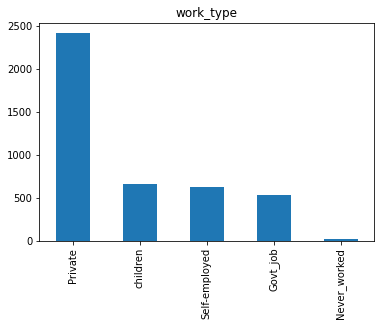

       Total   Persentase
Urban    2158        50.7
Rural    2095        49.3



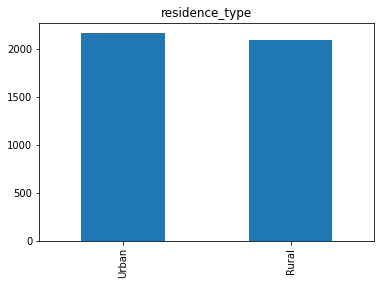

                 Total   Persentase
never smoked       1569        36.9
Unknown            1378        32.4
formerly smoked     671        15.8
smokes              635        14.9



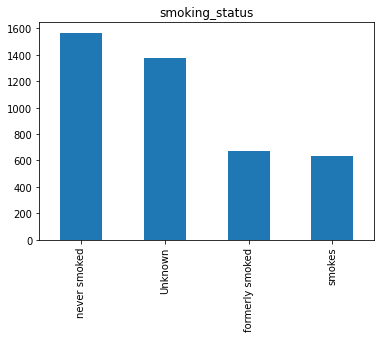

   Total   Persentase
0    3961        93.1
1     292         6.9



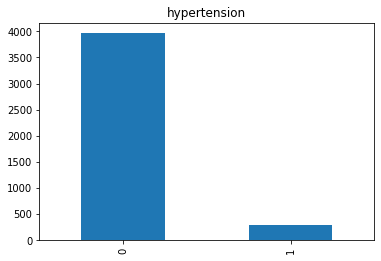

   Total   Persentase
0    4098        96.4
1     155         3.6



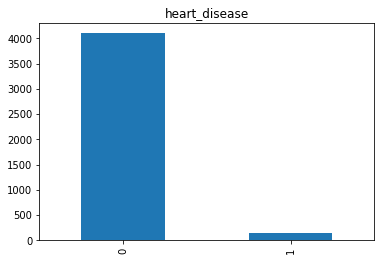

   Total   Persentase
0    4117        96.8
1     136         3.2



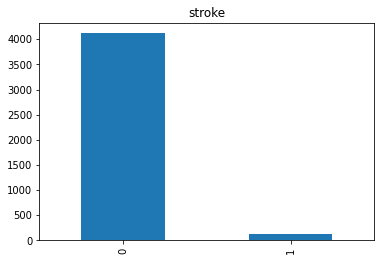

In [14]:
categorical_column = ["gender", "ever_married", "work_type", 
                      "residence_type", "smoking_status", 
                      "hypertension", "heart_disease", "stroke"]

for column in categorical_column:
    count = data[column].value_counts()
    percent = 100*data[column].value_counts(normalize=True)
    data_baru = pd.DataFrame({'Total ':count, 'Persentase':percent.round(1)})
    print(data_baru, end="\n\n")
    count.plot(kind='bar', title=column)
    plt.show()

Selanjutnya akan dilakukan analisa pada kolom numerical

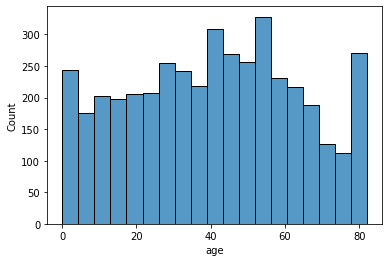

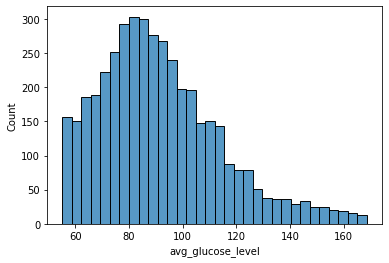

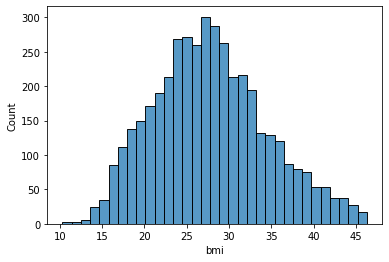

In [15]:
numerical_columns = ["age", "avg_glucose_level", "bmi"]

for column in numerical_columns:
    sns.histplot(data[column])
    plt.show()

**3.7 Analisis Multivariat**

Akan dilakukan analisa hubungan antara kolog categorical dan kolom stroke

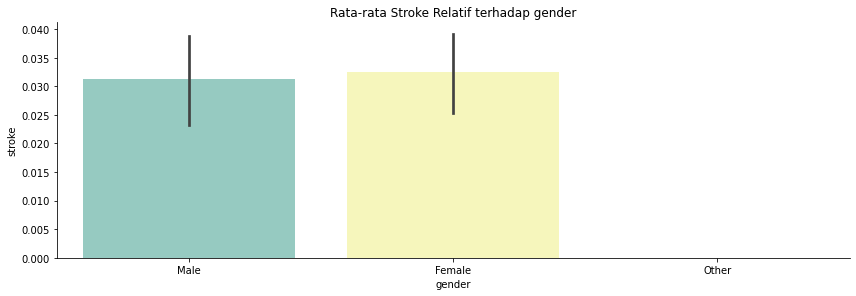

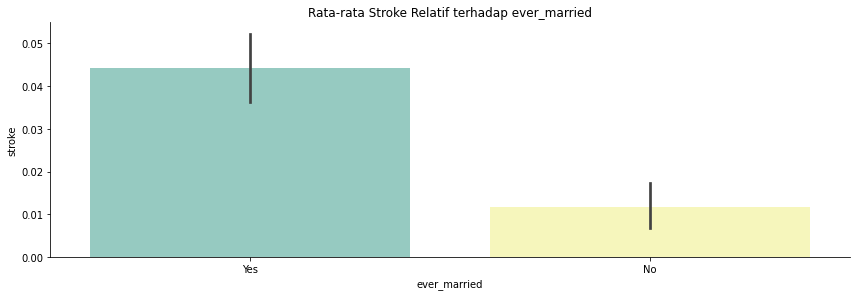

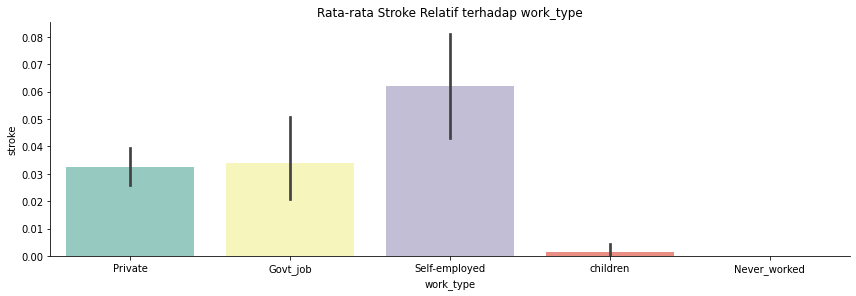

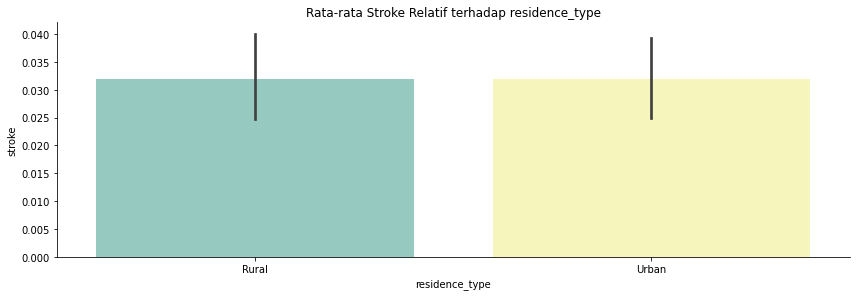

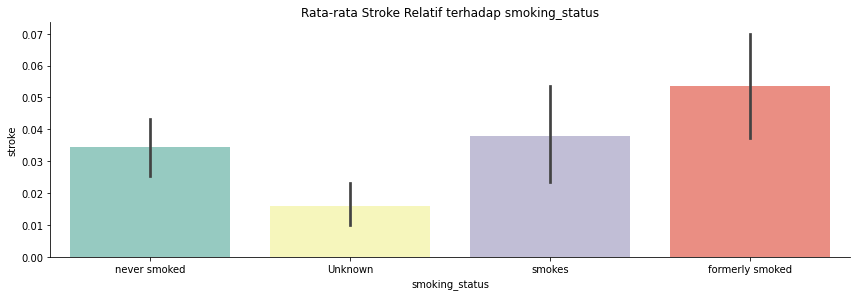

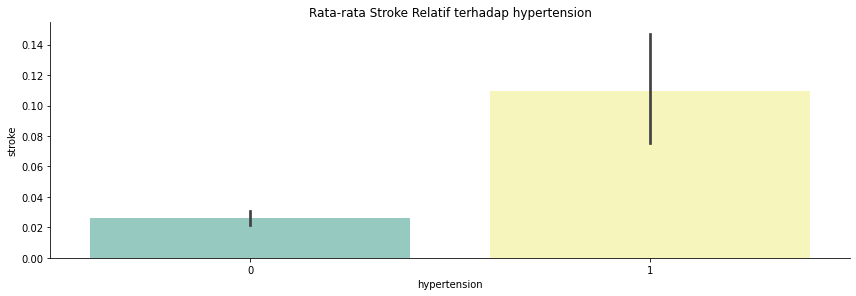

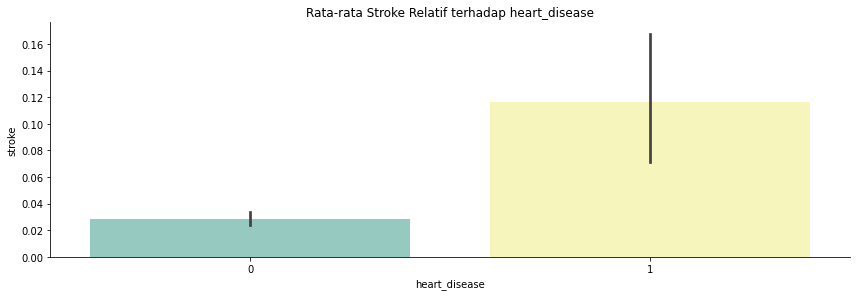

In [16]:
categorical_column = ["gender", "ever_married", "work_type",  "residence_type", "smoking_status", 
                      "hypertension", "heart_disease"]

for col in categorical_column:
  sns.catplot(x=col, y="stroke", kind="bar", dodge=False, height=4, aspect=3,  
              data=data, palette="Set3")
  plt.title("Rata-rata Stroke Relatif terhadap {}".format(col))
  plt.show()

plt.show()

Selanjutnya kita akan analisis hubungan kolom numerical dan kolom stroke

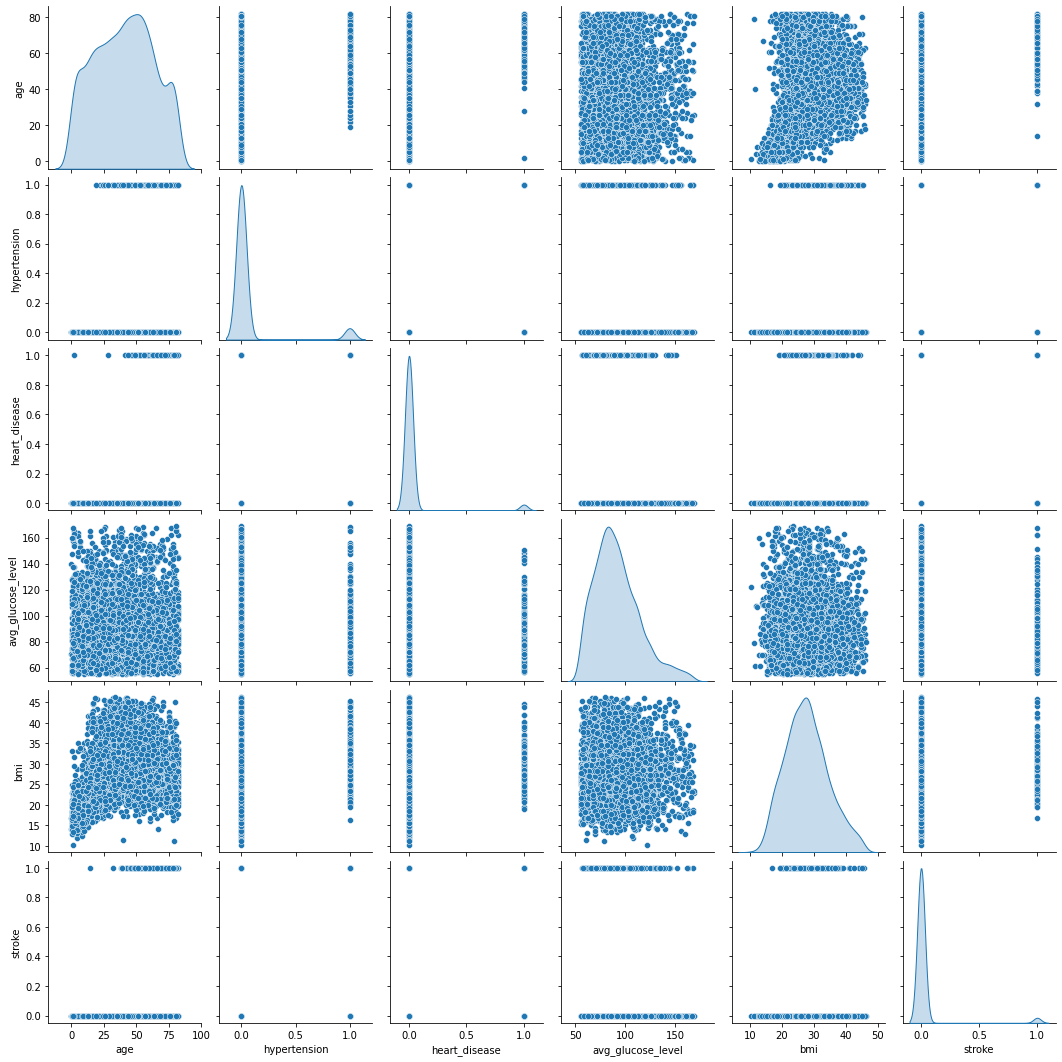

In [17]:
sns.pairplot(data, diag_kind="kde")
plt.show()

**3.8 Cek Korelasi**

Akan dilakukan pengecekan korelasi antar kolom numerik

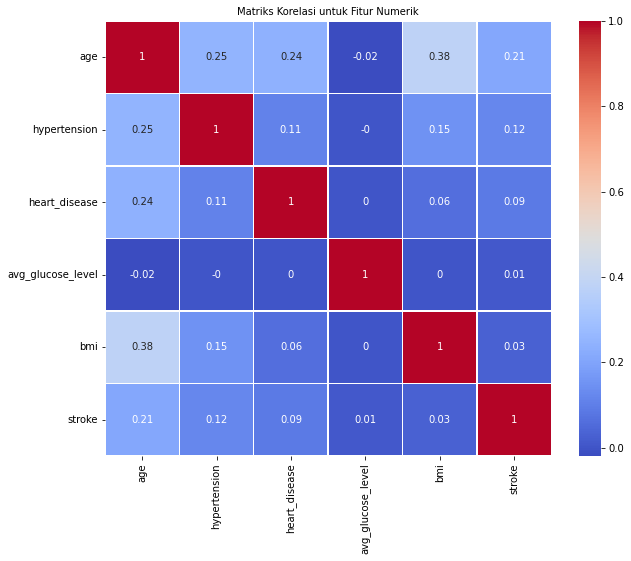

In [18]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matriks Korelasi untuk Fitur Numerik", size=10)
plt.show()

Selanjutnya akan dilakukan drop fitur yang tidak berkorelasi

In [19]:
data = data.drop(columns=["avg_glucose_level"])
print("\nKolom Setelah Didrop: ", data.columns)


Kolom Setelah Didrop:  Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'bmi', 'smoking_status', 'stroke'],
      dtype='object')


# **4. Persiapan Data (Data Preparation)**

**4.1 Encoding Categori Feature**

In [20]:
categorical_columns = [column for column in data.columns if data[column].dtype == 'O']
encoder = OrdinalEncoder()
data[categorical_columns] = encoder.fit_transform(data[categorical_columns])
data = data.astype("float64")
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4253 entries, 2 to 5109
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          4253 non-null   float64
 1   age             4253 non-null   float64
 2   hypertension    4253 non-null   float64
 3   heart_disease   4253 non-null   float64
 4   ever_married    4253 non-null   float64
 5   work_type       4253 non-null   float64
 6   residence_type  4253 non-null   float64
 7   bmi             4253 non-null   float64
 8   smoking_status  4253 non-null   float64
 9   stroke          4253 non-null   float64
dtypes: float64(10)
memory usage: 525.5 KB


**4.2 Splitting Data**

Data akan displit menjadi data train dan data test

In [22]:
x = data.drop(columns=["stroke"])
y = data["stroke"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=69)
print(f'Total seluruh sampel: {len(x)}')
print(f'Total data train: {len(x_train)}')
print(f'Total data test: {len(x_test)}')

Total seluruh sampel: 4253
Total data train: 3402
Total data test: 851


**4.3 Standarisasi Value**

In [24]:
all_columns = data.columns[:-1]
scaler = StandardScaler()
data[all_columns] = scaler.fit_transform(data[all_columns])
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,bmi,smoking_status,stroke
2,1.206460,1.753596,-0.271512,5.141859,0.782436,-0.183276,-1.014924,0.707655,0.606359,1.0
6,1.206460,1.486496,3.683079,5.141859,0.782436,-0.183276,-1.014924,-0.056328,0.606359,1.0
7,-0.827259,1.263912,-0.271512,-0.194482,-1.278060,-0.183276,0.985295,-0.745410,0.606359,1.0
9,-0.827259,1.664563,-0.271512,-0.194482,0.782436,-0.183276,0.985295,-0.535689,-1.240952,1.0
10,-0.827259,1.798113,3.683079,-0.194482,0.782436,-0.183276,-1.014924,0.288214,0.606359,1.0


# **5. Pembuatan Model**

In [39]:
svm = SVC()
svm.fit(x_train, y_train)

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

lr = LogisticRegression()
lr.fit(x_train, y_train)

rf = RandomForestClassifier()
rf.fit(x_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# **6. Evaluasi Model**

In [42]:
evaluation = pd.DataFrame(columns=['train', 'test'], index=["SVM","Decision Tree", 
                                                            "Logistic Regression", 
                                                            "Random Forest"])
model_dict = {
    "SVM": svm,
    "Decision Tree": dt,
    "Logistic Regression": lr,
    "Random Forest": rf
}
for name, model in model_dict.items():
    evaluation.loc[name, 'train'] = accuracy_score(y_true=y_train, 
                                                   y_pred=model.predict(x_train))
    evaluation.loc[name, 'test'] = accuracy_score(y_true=y_test, 
                                                  y_pred=model.predict(x_test))
 
evaluation

,train,test
SVM,0.968548,0.965922
Decision Tree,1,0.93772
Logistic Regression,0.968548,0.965922
Random Forest,1,0.965922


**Plot Hasil Evaluasi**

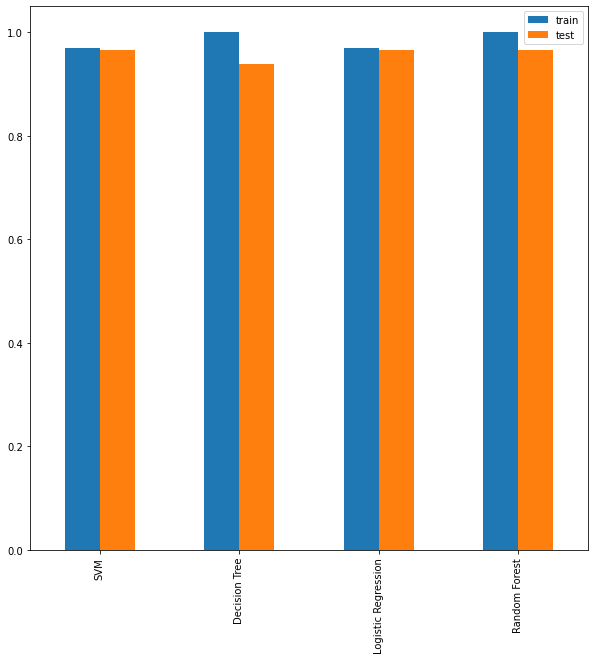

In [43]:
evaluation.plot(kind='bar', figsize=(10, 10))
plt.show()

**Perbandingan Model**

In [44]:
prediksi = x_test.iloc[:3].copy()
pred_dict = {'y_true':y_test[:3]}
for name, model in model_dict.items():
    pred_dict['Prediksi '+name] = model.predict(prediksi).round(1)
    
pd.DataFrame(pred_dict)

,y_true,Prediksi SVM,Prediksi Decision Tree,Prediksi Logistic Regression,Prediksi Random Forest
92,1.0,0.0,0.0,0.0,0.0
3916,0.0,0.0,0.0,0.0,0.0
4812,0.0,0.0,0.0,0.0,0.0
